In [1]:
# Let's load the labels file
import pandas as pd
labels_file_path_str: str = "./bands_labels.csv"
labels_df = pd.read_csv(labels_file_path_str, sep="\t")
dfX = labels_df[["Band"]]
dfY = labels_df[["Genre"]]
labels_df

Band Genre
0           http://dbpedia.org/resource/Vintage_Blue  Rock
1              http://dbpedia.org/resource/Tin_Alley  Rock
2          http://dbpedia.org/resource/The_Roulettes  Rock
3                  http://dbpedia.org/resource/Buhos  Rock
4      http://dbpedia.org/resource/Ripe_Banana_Skins  Rock
..                                               ...   ...
195         http://dbpedia.org/resource/Carl_Carlton  Soul
196    http://dbpedia.org/resource/Salsoul_Orchestra  Soul
197          http://dbpedia.org/resource/The_Nextmen  Soul
198  http://dbpedia.org/resource/The_Jackson_Sisters  Soul
199         http://dbpedia.org/resource/Orelha_Negra  Soul

[200 rows x 2 columns]

In [2]:
dfVectors = pd.read_csv("./oa100.txt", sep = " ", skiprows=[0])
dfVectors.columns = ["Band"] + [f"v{i}" for i in range(0,101)]  
# drop last empty value
dfVectors = dfVectors[["Band"] + [f"v{i}" for i in range(0,100)]]

In [3]:
dfXvectors = pd.concat([dfX.set_index("Band"), dfVectors.set_index("Band")], axis=1, join="inner")
dfXvectors

v0        v1        v2  \
Band                                                                            
http://dbpedia.org/resource/Vintage_Blue        -0.101661 -0.153132  0.227238   
http://dbpedia.org/resource/Tin_Alley           -0.083212 -0.194981  0.337864   
http://dbpedia.org/resource/The_Roulettes        0.567702 -0.204487  1.514109   
http://dbpedia.org/resource/Buhos               -0.052553 -0.119792  0.331403   
http://dbpedia.org/resource/Ripe_Banana_Skins   -0.052542 -0.127018  0.321062   
...                                                   ...       ...       ...   
http://dbpedia.org/resource/Carl_Carlton        -0.059549 -0.332138  0.462567   
http://dbpedia.org/resource/Salsoul_Orchestra   -0.054991 -0.075850  0.234934   
http://dbpedia.org/resource/The_Nextmen          0.163393 -0.476940  0.984449   
http://dbpedia.org/resource/The_Jackson_Sisters -0.121151 -0.218000  0.338082   
http://dbpedia.org/resource/Orelha_Negra        -0.017703 -0.040950  0.050595   

                                                       v3        v4        v5  \
Band                                                                            
http://dbpedia.org/resource/Vintage_Blue        -0.104191  0.169468  0.097313   
http://dbpedia.org/resource/Tin_Alley           -0.129091  0.182630  0.133089   
http://dbpedia.org/resource/The_Roulettes       -0.500085  0.279755 -0.418795   
http://dbpedia.org/resource/Buhos               -0.118317  0.248885  0.111773   
http://dbpedia.org/resource/Ripe_Banana_Skins   -0.143478  0.205448  0.100599   
...                                                   ...       ...       ...   
http://dbpedia.org/resource/Carl_Carlton        -0.477867  0.425834  0.410536   
http://dbpedia.org/resource/Salsoul_Orchestra   -0.268392 -0.036323 -0.248365   
http://dbpedia.org/resource/The_Nextmen         -0.887747 -0.682041 -0.466649   
http://dbpedia.org/resource/The_Jackson_Sisters -0.166915  0.255404  0.152393   
http://dbpedia.org/resource/Orelha_Negra        -0.031575  0.038227  0.012327   

                                                       v6        v7        v8  \
Band                                                                            
http://dbpedia.org/resource/Vintage_Blue         0.290867 -0.172756 -0.214820   
http://dbpedia.org/resource/Tin_Alley            0.364554 -0.103778 -0.153616   
http://dbpedia.org/resource/The_Roulettes        1.104197 -0.533400  0.357073   
http://dbpedia.org/resource/Buhos                0.386889 -0.134541 -0.137402   
http://dbpedia.org/resource/Ripe_Banana_Skins    0.367207 -0.080136 -0.122846   
...                                                   ...       ...       ...   
http://dbpedia.org/resource/Carl_Carlton         0.926106  0.041566 -0.219600   
http://dbpedia.org/resource/Salsoul_Orchestra    0.823546  0.150442  0.694965   
http://dbpedia.org/resource/The_Nextmen          1.179778  0.606094  0.047763   
http://dbpedia.org/resource/The_Jackson_Sisters  0.449829 -0.054923 -0.116548   
http://dbpedia.org/resource/Orelha_Negra         0.046358 -0.072273 -0.045396   

                                                       v9  ...       v90  \
Band                                                       ...             
http://dbpedia.org/resource/Vintage_Blue         0.217480  ... -0.004670   
http://dbpedia.org/resource/Tin_Alley            0.314491  ...  0.044746   
http://dbpedia.org/resource/The_Roulettes        1.036889  ... -0.967095   
http://dbpedia.org/resource/Buhos                0.286090  ...  0.049862   
http://dbpedia.org/resource/Ripe_Banana_Skins    0.210424  ...  0.014177   
...                                                   ...  ...       ...   
http://dbpedia.org/resource/Carl_Carlton        -0.090409  ... -0.256882   
http://dbpedia.org/resource/Salsoul_Orchestra    0.445558  ... -0.954127   
http://dbpedia.org/resource/The_Nextmen          0.193933  ... -1.654998   
http://dbpedia.org/resource/The_Jackson_Sisters  0.212199

In [7]:
# evaluate in 10-fold CV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
clf = MLPClassifier(max_iter=10000)
scores = cross_val_score(clf, dfXvectors, dfY.values.ravel(), cv=10)
scores.mean()

0.65

In [8]:
scores.std()

0.07745966692414834

In [10]:
# Create new ground truth for visualization by classes
# Targets: artists, record labels, cities
# get all papers from the graph
from rdflib import Graph, RDF, URIRef
import re
import pandas as pd
import numpy as np

g = Graph()
g.parse('./artists_graph.nt')

lst_entities = []
lst_Y = []

regexp = re.compile('^http://dbpedia.org/resource/[0-9a-zA-Z_()]+$',re.ASCII)

class1_entities = set()
for e in g.subjects(RDF.type,URIRef("http://dbpedia.org/ontology/RecordLabel")):
        s = e.toPython()
        if regexp.match(s):
            class1_entities.add(s)

for e in class1_entities:
    lst_entities.append(e)
    lst_Y.append("label")
    
class2_entities = set()
for e in g.subjects(RDF.type,URIRef("http://dbpedia.org/ontology/MusicalWork")):
        s = e.toPython()
        if regexp.match(s):
            class2_entities.add(s)

for e in class2_entities:
    lst_entities.append(e)
    lst_Y.append("work")
    
class3_entities = set()
for e in g.subjects(RDF.type,URIRef("http://dbpedia.org/ontology/Genre")):
        s = e.toPython()
        if regexp.match(s):
            class3_entities.add(s)

for e in class3_entities:
    lst_entities.append(e)
    lst_Y.append("genre")

# all other entities
other_entities = set()
for e in g.subjects():
    s = e.toPython()
    if regexp.match(s):
        if not (s in lst_entities):
            other_entities.add(s)
      
for e in other_entities:
    lst_entities.append(e)
    lst_Y.append("-")

dfY = pd.DataFrame (lst_Y, columns = ['class'])

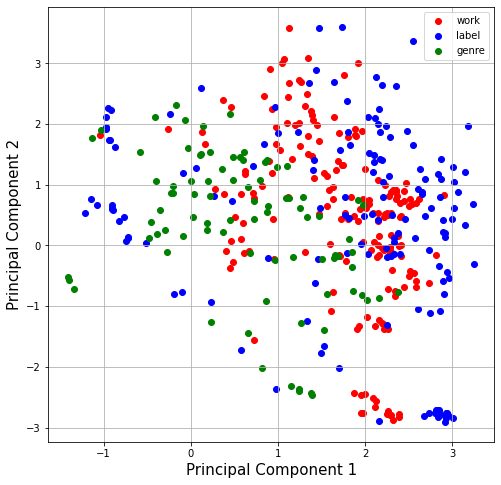

In [12]:
# Create a visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dfVectorsOnly = dfVectors[[f"v{i}" for i in range(0,100)]]

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfVectorsOnly)
principalDf = pd.DataFrame(data = pca_result
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dfY], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = ['work','label', 'genre']
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()